In [2]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [3]:
X = pickle.load(open("/Users/macbookpro/Documents/ptb_xl/scp_filter_v2/all_X_ptbxl.pcl", 'rb'))
y = np.array(pickle.load(open("/Users/macbookpro/Documents/ptb_xl/scp_filter_v2/all_y_ptbxl.pcl", 'rb'))).astype('int')

In [90]:
print(y[20:30])

[0 2 4 0 0 2 0 2 0 3]


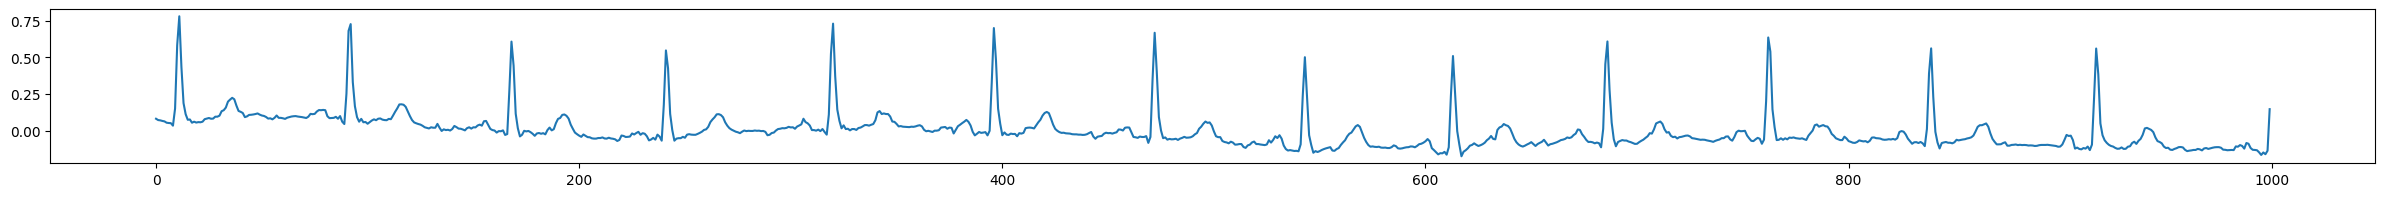

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,2))
plt.plot(X[21,:,0])
plt.show()

# Single beat extraction

1


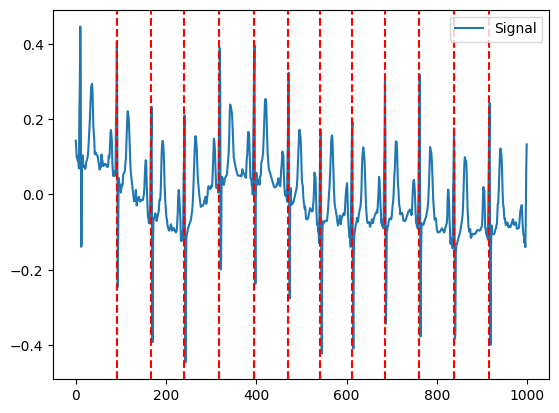

In [128]:
ecg_signal = X[21,:,1]
ecg_signal = ecg_signal

print(y[7])
# Automatically process the (raw) ECG signal
signals, info = nk.ecg_process(ecg_signal, sampling_rate=100)
# Extract clean ECG and R-peaks location
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Raw"]
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks, cleaned_ecg)



<class 'dict'>


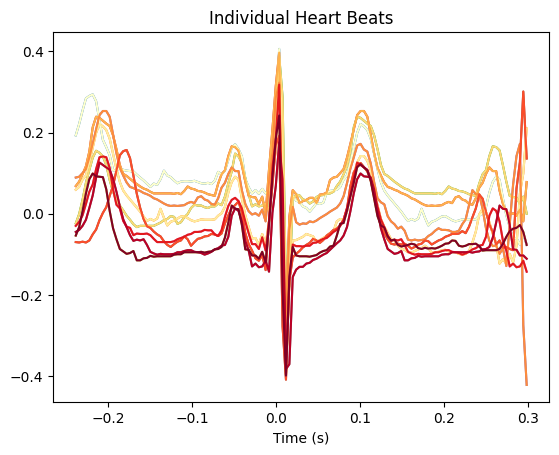

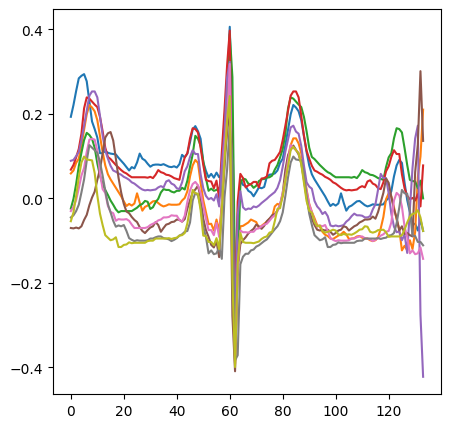

In [129]:
# Plotting all the heart beats
epochs = nk.ecg_segment(cleaned_ecg, rpeaks=None, sampling_rate=250, show=True)
print(type(epochs))
keys = epochs.keys()

plt.figure(figsize=(5,5))
for k in keys:
    a = epochs[k]['Signal'].to_numpy()
    plt.plot(a)
plt.show()

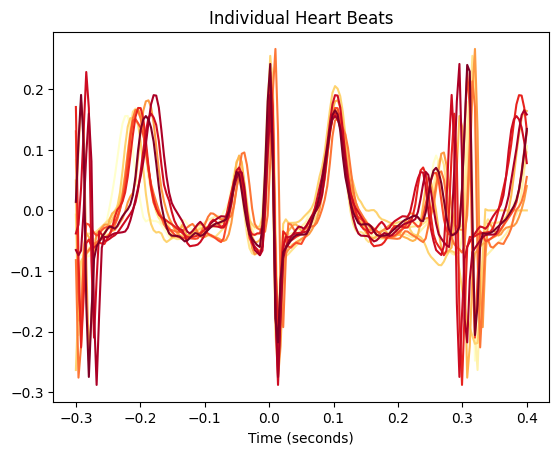

In [95]:
# Define a function to create epochs
def extract_heartbeats(cleaned, peaks, sampling_rate=None): 
    heartbeats = nk.epochs_create(cleaned, 
                                  events=peaks, 
                                  epochs_start=-0.3, 
                                  epochs_end=0.4, 
                                  sampling_rate=sampling_rate)
    heartbeats = nk.epochs_to_df(heartbeats)
    return heartbeats
    
heartbeats = extract_heartbeats(cleaned_ecg, peaks=rpeaks, sampling_rate=250)
heartbeats.head()

# Prepare figure
fig, ax = plt.subplots()

ax.set_title("Individual Heart Beats")
ax.set_xlabel("Time (seconds)")

heartbeats_pivoted = heartbeats.pivot(index='Time', columns='Label', values='Signal')
heartbeats_pivoted.head()

# Aesthetics
labels = list(heartbeats_pivoted)
labels = ['Channel ' + x for x in labels] # Set labels for each signal
cmap = iter(plt.cm.YlOrRd(np.linspace(0,1, int(heartbeats["Label"].nunique())))) # Get color map
lines = [] # Create empty list to contain the plot of each signal

for i, x, color in zip(labels, heartbeats_pivoted, cmap):
    line, = ax.plot(heartbeats_pivoted[x], label='%s' % i, color=color)
    lines.append(line)

# ECg delinearation

2


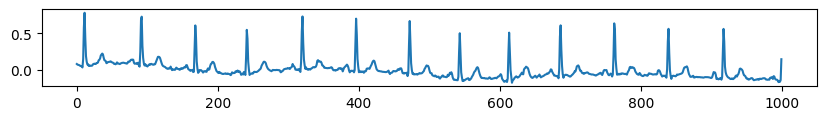

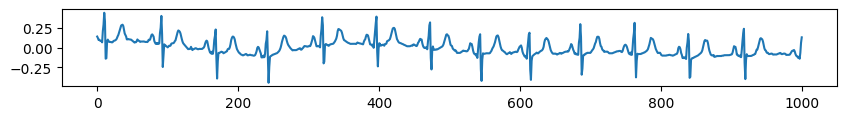

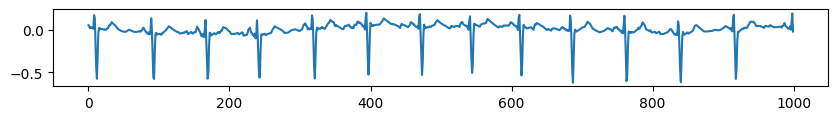

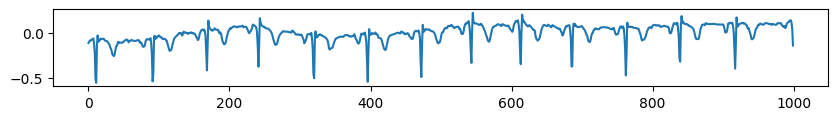

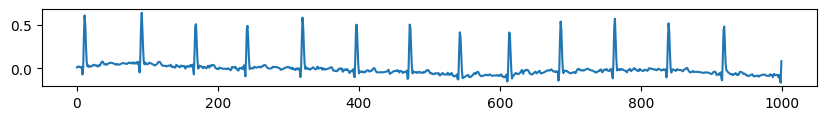

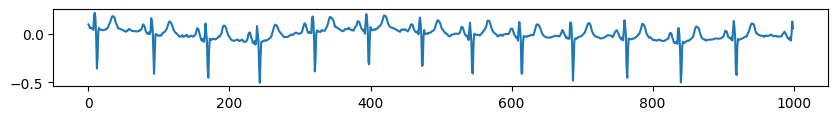

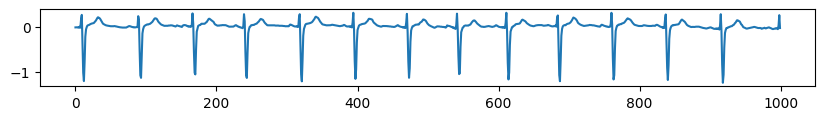

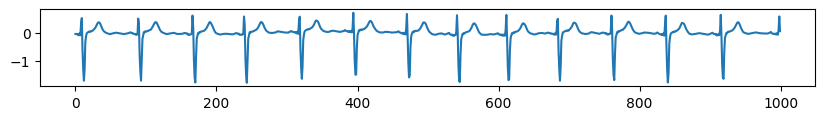

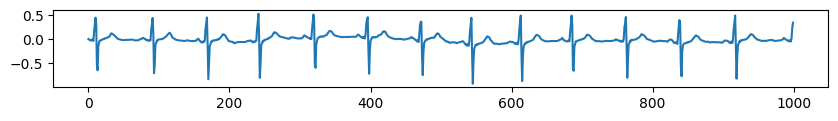

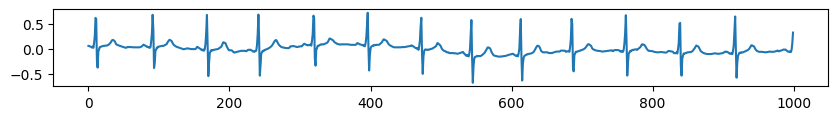

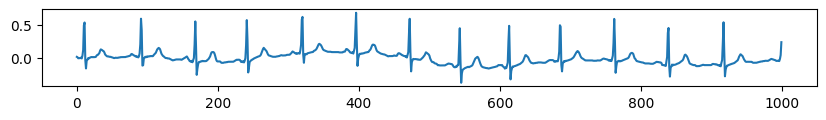

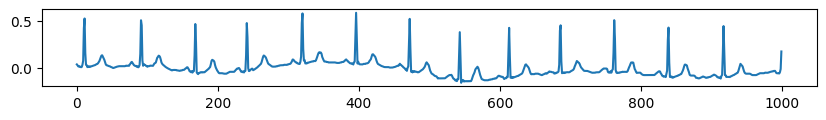

In [10]:
print(y[21])
import matplotlib.pyplot as plt
for i in range(12):
    plt.figure(figsize=(10,1))
    plt.plot(X[21,:,i])
    plt.show()

0
{'ECG_R_Peaks': array([  944,  1989,  3100,  4019,  5054,  6072,  7024,  8130,  9169,
       10109, 11196, 12249, 13283, 14133, 15155, 16162, 17020, 18012,
       19041, 20065, 21008, 22057, 23003, 23989, 25060, 26097, 27062,
       28097, 29146, 30187, 31150, 32221, 33315, 34321, 35373, 36462,
       37422, 38382, 39434, 40500, 41424, 42468, 43457, 44373, 45364,
       46311, 47217, 48223, 49217, 49945]), 'sampling_rate': 1000}


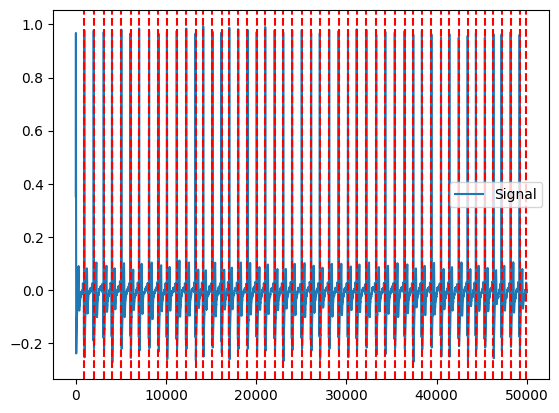

In [61]:
# Retrieve ECG data from data folder
ecg_signal = nk.data(dataset="ecg_1000hz")
# ecg_signal = X[20,:,1]
# ecg_signal = ecg_signal[0:600]
rate = 1000
print(y[20])
# Extract R-peaks locations, use out data
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=rate)

print(rpeaks)
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal)

# Zooming into the first 5 R-peaks
# plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg_signal[:600])

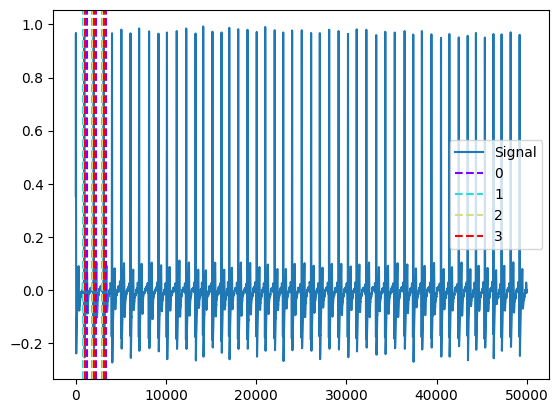

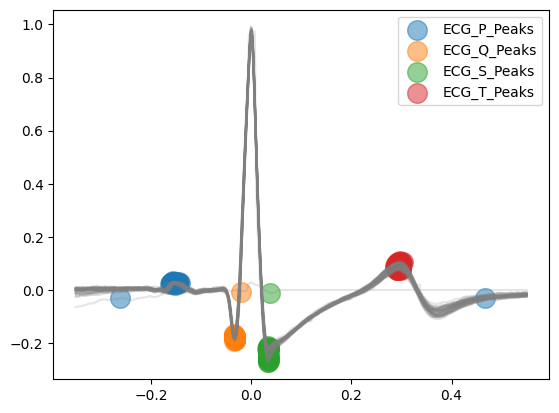

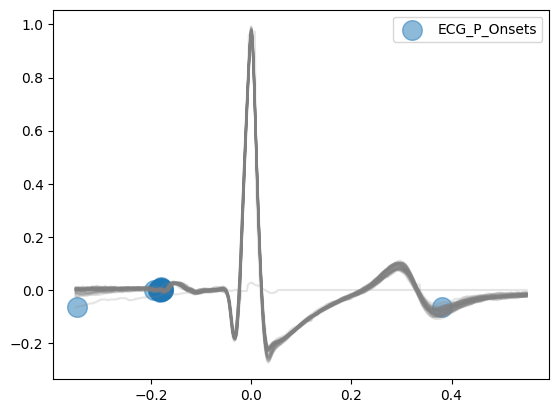

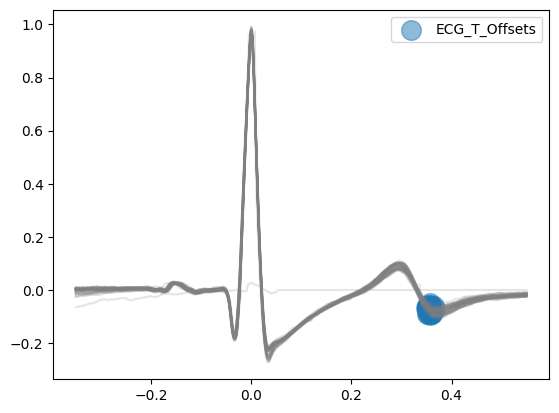

In [62]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=rate, method="peak")

# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], ecg_signal)



# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(ecg_signal, 
                                rpeaks, 
                                sampling_rate=rate, 
                                method="peak", 
                                show=True, 
                                show_type='peaks')

# Delineate the ECG signal and visualizing all P-peaks boundaries
signal_peak, waves_peak = nk.ecg_delineate(ecg_signal, 
                                        rpeaks, 
                                        sampling_rate=rate,
                                        method="peak", 
                                        show=True, 
                                        show_type='bounds_P')

# Delineate the ECG signal and visualizing all T-peaks boundaries
signal_peaj, waves_peak = nk.ecg_delineate(ecg_signal, 
                                        rpeaks, 
                                        sampling_rate=rate, 
                                        method="peak", 
                                        show=True, 
                                        show_type='bounds_T')

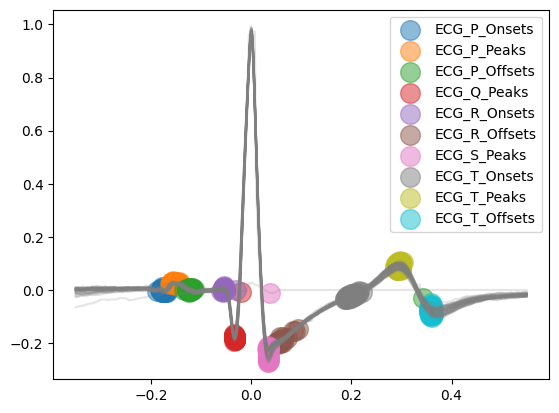

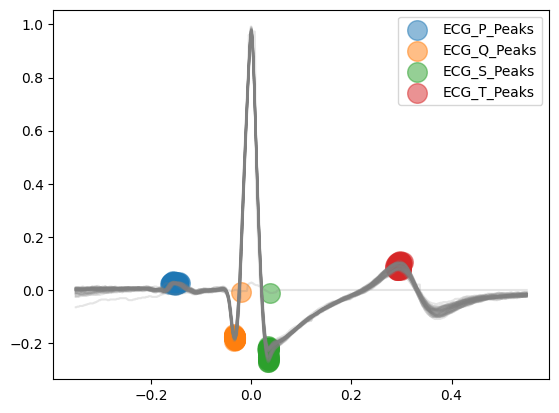

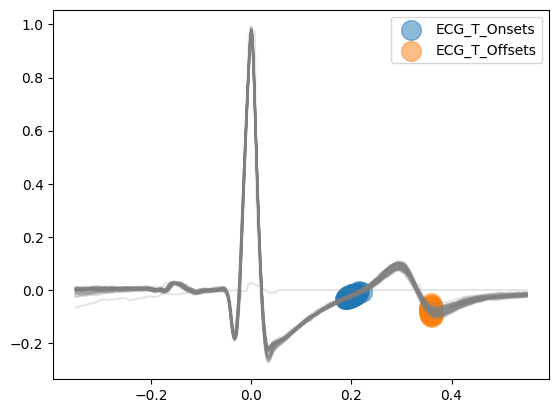

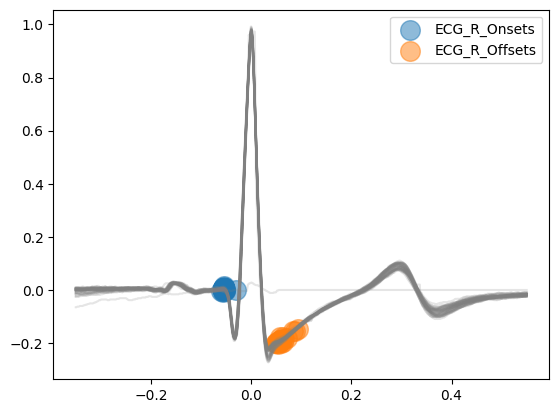

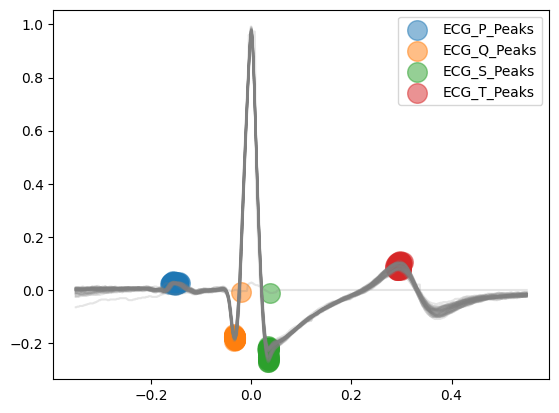

In [65]:
# Delineate the ECG signal
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, 
                                        rpeaks, 
                                        sampling_rate=rate, 
                                        method="cwt", 
                                        show=True, 
                                        show_type='all')

# Visualize P-peaks and T-peaks
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, 
                                        rpeaks, 
                                        sampling_rate=rate, 
                                        method="cwt", 
                                        show=True, 
                                        show_type='peaks')


# Visualize T-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=rate, 
                                         method="cwt", 
                                         show=True, 
                                         show_type='bounds_T')

# Visualize R-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=rate, 
                                         method="cwt", 
                                         show=True, 
                                         show_type='bounds_R')


# Visualize S-waves boundaries
signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=rate, 
                                         method="cwt", 
                                         show=True, 
                                         show_type='peaks')

/Users/macbookpro/Documents/mac_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/macbookpro/Documents/mac_env/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/macbookpro/Documents/mac_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/macbookpro/Documents/mac_env/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/macbookpro/Documents/mac_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/macbookpro/Documents/mac_env/lib/python3.10/site-packages/nu

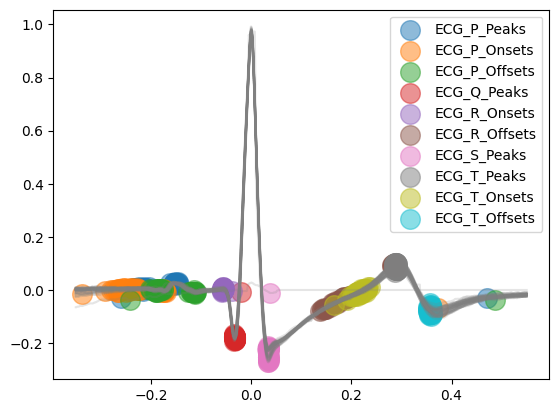

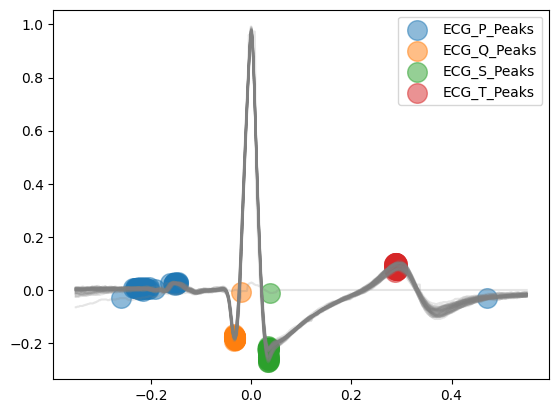

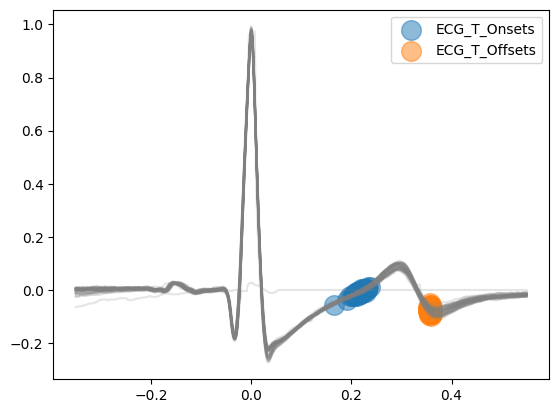

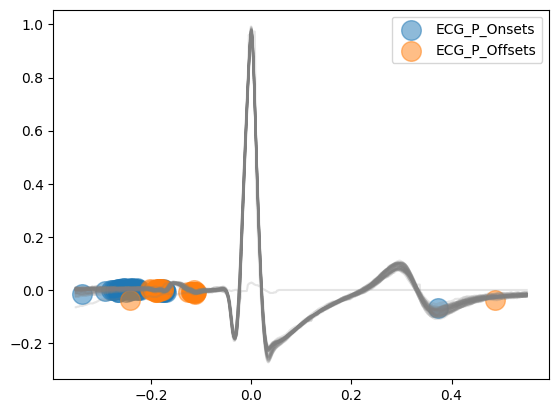

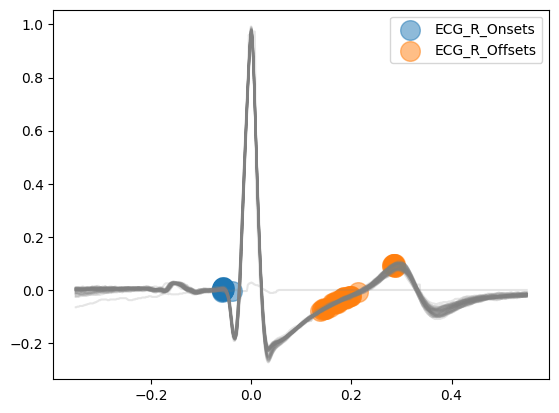

In [67]:
# Delineate the ECG signal
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=3000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='all')

# Visualize P-peaks and T-peaks
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=3000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='peaks')

# visualize T-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=3000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='bounds_T')

# Visualize P-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=3000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='bounds_P')

# Visualize R-wave boundaries
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, 
                                         rpeaks, 
                                         sampling_rate=3000, 
                                         method="dwt", 
                                         show=True, 
                                         show_type='bounds_R')